# Generate Spatially Consistent Statistical Channels for Realistic Simulations
**What is spatial consistency**

Spatial consistency in 3D wireless channel modeling refers to the predictability and stability of radio propagation characteristics across different spatial locations within a three-dimensional environment. In simpler terms, it's about how the wireless channel behaves consistently in terms of signal strength, fading, and other properties as you move around in physical space. When modeling wireless channels in three dimensions, it's essential to consider how the signal behaves not only in different locations but also in different directions (height, azimuth, and elevation angles). Spatial consistency helps researchers and engineers understand how the wireless signal propagates throughout a given area, allowing for more accurate predictions of signal coverage, quality, and reliability. In practical terms, spatial consistency means that if you move from one point to another within the modeled environment, you can expect similar channel characteristics, such as signal strength and fading statistics, assuming the environment remains unchanged. This consistency is crucial for designing and optimizing wireless communication systems, especially in scenarios like urban environments or indoor spaces where signal propagation can be complex and variable.

The tutorial covers the following:

- [Import Libraries](#Import-Libraries)
    - [Import Python Libraries](#Import-Python-Libraries)
    - [Import 5G Libraries](#Import-5G-Toolkit)
- [Simulation Parameters](#Simulation-Parameters)
- [Antenna Arrays](#Antenna-Arrays)
    - [Antenna Array at Rx](#Antenna-Arrays-at-Rx)
    - [Antenna Array at Tx](#Antenna-Arrays-at-Tx)
- [Node Mobility](#Node-Mobility)
- [Simulation-Layout](#Simulation-Layout)
- [Channel Parameters, Channel Coefficients and OFDM Channel](#Channel-Parameters,--Channel-Coefficients-and-OFDM-Channel)

The tutorial will demonstate the following features which are expected characteristics of wireless channels:

- Power variation accross the time and space.
- Spatial distribution of LoS/NLoS links.
- Doppler characteristics accross time and space.
- Multipath delay variation accross time and space.

## Import Libraries

### Import Python Libraries

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# %matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np

## Import 5G Toolkit

In [2]:
# importing necessary modules for simulating channel model
import sys
sys.path.append("../../../")
from toolkit5G.ChannelModels import NodeMobility
from toolkit5G.ChannelModels import AntennaArrays
from toolkit5G.ChannelModels import SimulationLayout

In [3]:
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:60% !important; }</style>"))

## Simulation Parameters

Define the following Simulation Parameters:

  * ``propTerrain`` defines propagation terrain for BS-UE links
  * ``carrierFrequency`` defines  carrier frequency in Hz
  * ``nBSs`` defines number of Base Stations (BSs)
  * ``nUEs`` defines number of User Equipments (UEs) 
  * ``nSnapShots`` defines number of SnapShots, where SnapShots correspond to different time-instants at which a mobile user channel is being generated. 

In [4]:
# Simulation Parameters
propTerrain      = "UMa"         # Propagation Scenario or Terrain for BS-UE links
carrierFrequency = 3*10**9       # carrier frequency in Hz
nBSs             = 3             # number of BSs 
nUEs             = 1             # number of UEs 
nSnapShots       = 64            # number of SnapShots

## Antenna Arrays
### Antenna Array at Rx

The following steps describe the procedure to generate AntennaArrays Objects at a single carrier frequency both at Tx and Rx side:

* Choose an omni directional dipole antenna for Rx, for which we have to pass the string "OMNI" while instantiating `AntennaArrays` class.

* Pass `arrayStructure` of `[1,1,2,2,1]` meaning 1 panel in vertical direction, 1 panel in horizonatal direction, 2 antenna elements per column per panel, 2 columns per panel and 1 correspond to antenna element being single polarized. 

* For this antenna structure, the number of Rx antennas `Nr` to be 4.



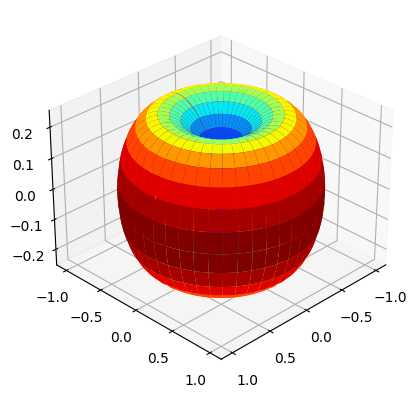

In [5]:
# Antenna Array at UE side
# antenna element type to be "OMNI"
# with single panel and 4 single polarized antenna element per panel.
ueAntArray = AntennaArrays(antennaType = "OMNI", 
                           centerFrequency = carrierFrequency,
                           arrayStructure  = np.array([1,1,2,2,1]))
                            
ueAntArray()

# num of Rx antenna elements
nr = ueAntArray.numAntennas
# Radiation Pattern of Rx antenna element 
fig, ax = ueAntArray.displayAntennaRadiationPattern()

### Antenna Array at Tx

* We choose a parabolic antenna for Tx, for which we have to pass the string `"3GPP_38.901"` while instantiating `AntennaArrays` class.

* We pass `arrayStructure` of `[1,1,2,4,2]` meaning 1 panel in vertical direction, 1 panel in horizonatal direction, 2 antenna elements per column per panel, 4 columns per panel and 2 correspond to     antenna element being dual polarized. 

* With this structure, we obtain number of Tx antennas `nt` to be 16. 

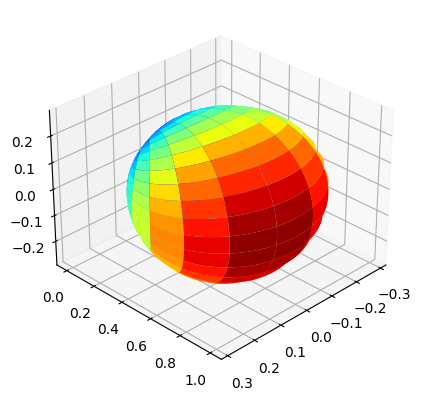

In [6]:
# Antenna Array at BS side
# antenna element type to be "3GPP_38.901", a parabolic antenna 
# with single panel and 8 dual polarized antenna element per panel.


bsAntArray = AntennaArrays(antennaType     = "3GPP_38.901", 
                           centerFrequency = carrierFrequency,
                           arrayStructure  = np.array([1,1,2,4,2]))
bsAntArray()

# num of Tx antenna elements
nt = bsAntArray.numAntennas
# Radiation Pattern of Tx antenna element 
fig, ax = bsAntArray.displayAntennaRadiationPattern()

## Node Mobility
Generate the route/trajectory for the mobile UE:

* All the Base Stations (BSs) are considered to be static and the User Equipments (UE) is mobile.

* The UE is moving at 0.833 m/s (3 kmph) on a circular trajectory of radius 250 meter centered around origin.

* For the UE, 60 snapshots are drawn while in motion on the circle with an interval of 5 sec.
    * The parameters are selected such that the UE complete the circumference of the circle.

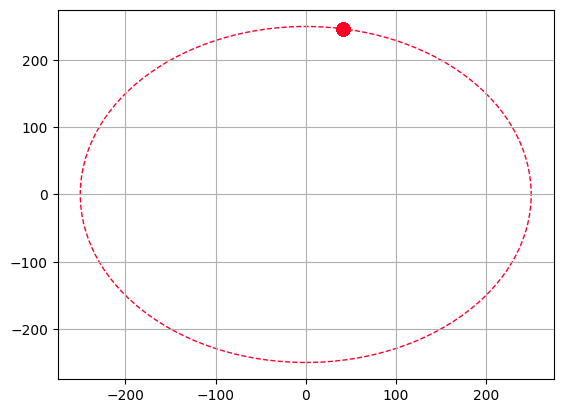

In [7]:
# NodeMobility parameters
# assuming that all the BSs are static and all the UEs are mobile.
# time values at each snapshot.

isInitLocationRandom    = True      # Initial location of the UE is random.
initAngle               = None      # Not required when isInitLocationRandom is True.
isInitOrientationRandom = False     # UE Orientations are UE. Not randomized.
snapshotInterval        = (0.5*10**-3)/14 # 5 second

speed      = 0.833 # speed of the UE 3 Kmph
radius     = 250   # 3 Kmph
timeInst   = snapshotInterval*np.arange(nSnapShots, dtype=np.float32) 
UEroute    = NodeMobility("circular", nUEs, timeInst, radius, radius, 
                          speed, speed, isInitLocationRandom, initAngle, 
                          isInitOrientationRandom)
UEroute()
fig, ax    = UEroute.displayRoute()
ax.set_aspect(True)

## Simulation Layout

We define the simulation topology parametes:

 - ``ISD``: Inter Site Distance
 - ``minDist``: Minimum distance between transmitter and receiver.
 - ``bsHt``: BS heights 
 - ``ueHt``: UE heights
 - ``topology``: Simulation Topology
 - ``nSectorsPerSite``: Number of Sectors Per Site
 
Furthermore, users can access and update following parameters as per their requirements for channel using the handle simLayoutObj.x where x is:

 - The following parameters can be accessed or updated immendiately after object creation
    - ``UEtracks``
    - ``UELocations``
    - ``ueOrientation``
    - ``UEvelocityVector``
    - ``BStracks``
    - ``BSLocations``
    - ``bsOrientation``
    - ``BSvelocityVector``
    
 - The following parameters can be accessed or updated after calling the object
    - ``linkStateVec``
    
    

      enableSpatialConsistency: True
               memoryEfficient: False
enableSpatialConsistencyIndoor: True


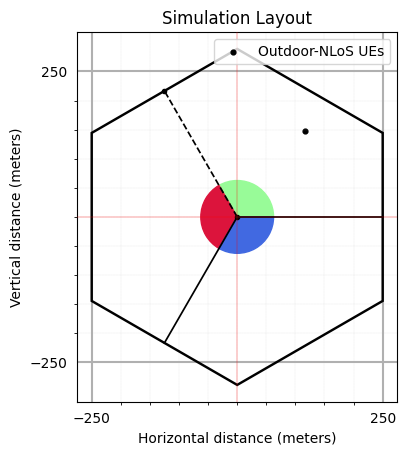

In [8]:
# Layout Parameters
isd             = 500         # inter site distance
minDist         = 35          # min distance between each UE and BS 
ueHt            = 1.5         # UE height
bsHt            = 35          # BS height
topology        = "Hexagonal" # BS layout type
nSectorsPerSite = 3           # number of sectors per site

memoryEfficient                = False
enableSpatialConsistencyLoS    = True
enableSpatialConsistencyIndoor = True


print("      enableSpatialConsistency: "+str(enableSpatialConsistencyLoS))    
print("               memoryEfficient: "+str(memoryEfficient))    
print("enableSpatialConsistencyIndoor: "+str(enableSpatialConsistencyIndoor))    

# simulation layout object                                 
simLayoutObj = SimulationLayout(numOfBS = nBSs, 
                                numOfUE = nUEs,
                                heightOfBS = bsHt, 
                                heightOfUE = ueHt,
                                ISD = isd, 
                                layoutType = topology, 
                                numOfSectorsPerSite = nSectorsPerSite,
                                ueRoute = UEroute,
                                memoryEfficient = memoryEfficient,
                                enableSpatialConsistencyLoS = enableSpatialConsistencyLoS, 
                                enableSpatialConsistencyIndoor = enableSpatialConsistencyIndoor) 

# Update UE location for motion over a circle centered around the BS location.
# simLayoutObj.UELocations = -simLayoutObj.UEtracks.mean(0)

simLayoutObj(terrain = propTerrain,
             carrierFreq = carrierFrequency,
             ueAntennaArray = ueAntArray,
             bsAntennaArray = bsAntArray,
             forceLOS = False)

# displaying the topology of simulation layout

fig, ax = simLayoutObj.display2DTopology()

ax.scatter(simLayoutObj.UELocations[0,0]+simLayoutObj.UEtracks[:,0,0], 
           simLayoutObj.UELocations[0,1]+simLayoutObj.UEtracks[:,0,1],  
           color="k", label = "NLoS Instants", zorder=-1)
ax.scatter(simLayoutObj.UELocations[0,0]+simLayoutObj.UEtracks[simLayoutObj.linkState[:,0,3],0,0],
           simLayoutObj.UELocations[0,1]+simLayoutObj.UEtracks[simLayoutObj.linkState[:,0,3],0,1],  
           color="r", label = "LoS Instants", zorder=-1)
ax.scatter(simLayoutObj.UELocations[0,0],simLayoutObj.UELocations[0,1], color="b", label = "UE-InitialLocation", zorder=-3)
ax.set_xlabel("x-coordinates (m)")
ax.set_ylabel("y-coordinates (m)")
ax.set_title("Simulation Topology")
ax.legend()
# plt.show()

## Channel Parameters,  Channel Coefficients and OFDM Channel

The user can access the channel coefficents and other parameters using following handles:

- LSPs/SSPs: paramGenObj.x where x is
    - ``linkStateVec``
    - ``delaySpread``
    - ``phiAoA_LoS``, ``phiAoA_mn``, ``phiAoA_spread``
    - ``thetaAoA_LoS``, ``thetaAoA_mn``, ``thetaAoA_spread``
    - ``phiAoD_LoS``, ``phiAoD_mn``, ``phiAoD_spread``
    - ``thetaAoD_LoS``, ``thetaAoD_mn``, ``thetaAoD_spread``
    - ``xpr``
    - ``pathloss``, ``pathDelay``, ``pathPower``
    - ``shadowFading``
    
- Channel Co-efficeints: channel.x where x is
    - ``coefficients`` 
    - ``delays``

- Shape of OFDM Channel:
    - `Hf` is of shape : ``(number of carrier frequencies, number of snapshots, number of BSs, number of UEs, Nfft, number of Rx antennas, number of Tx antennas)``

In [9]:
# Generate SSPs/LSPs Parameters: 
paramGenObj = simLayoutObj.getParameterGenerator(memoryEfficient = True, 
                                                 enableSpatialConsistencyForLSPs = True, 
                                                 enableSpatialConsistencyForSSPs = True,
                                                 enableSpatialConsistencyForInitialPhases = True)

# Generate Channel Coefficeints and Delays: SSPs/LSPs
channel = paramGenObj.getChannel(applyPathLoss = True)
# Channel coefficients can be accessed using: channel.coefficients
# Channel delays can be accessed using:       channel.delays

# Generate OFDM Channel
Nfft = 2048
Hf   = channel.ofdm(30*10**3, Nfft, simLayoutObj.carrierFrequency)

[Warning]: Pathloss model for UMa is defined only for BS height 'hBS' = 25! Ignoring for now but might results in unexpected behaviour!
[Warning]: UE height 'hUE' cannot be less than 1.5! These values are forced to 1.5! for 'UMa' 


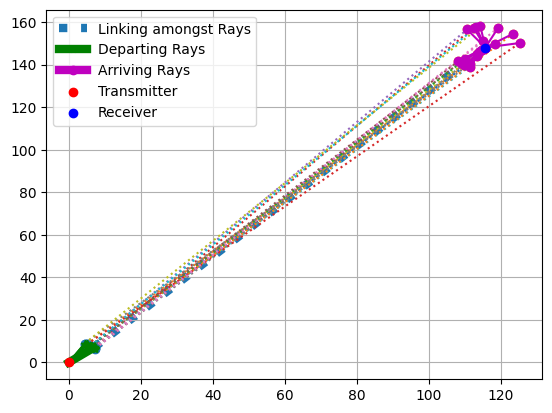

In [10]:
fig, ax = paramGenObj.displayClusters(indices=(0, 1, 0), rayIndex=1, carrierIndex=0, 
                                      radiusRx=10, radiusTx=10, displayPlot=False)

## Frequency Domain Consistency

In [11]:
Hf.shape

(1, 64, 3, 1, 2048, 4, 16)

### Amplitude Spectrum: Each subcarrier accross time

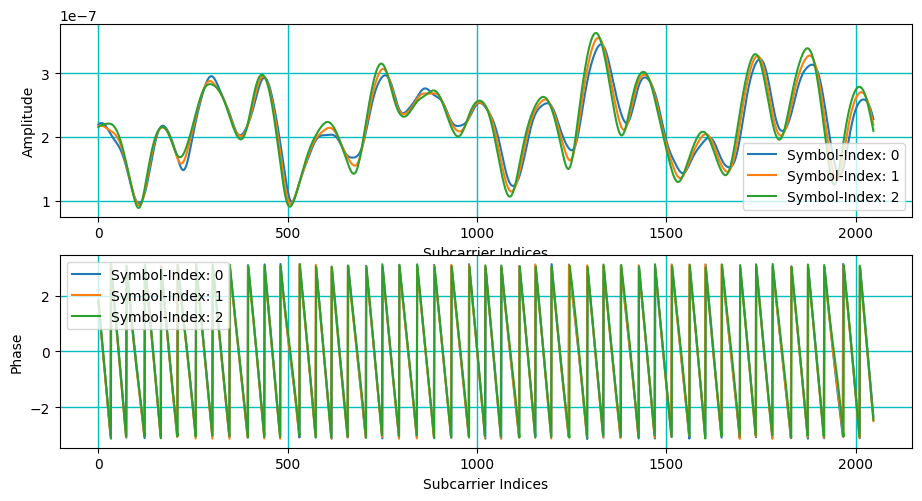

In [12]:
fig, ax = plt.subplots(2,1, figsize = (11,5.5))

carrierIndex = 0
bsIndex      = 0
ueIndex      = 0
bsAntIndex   = 0
ueAntIndex   = 0

for snap in range(3):
    ax[0].plot(np.abs(Hf[carrierIndex,snap,bsIndex,ueIndex,:,bsAntIndex,ueAntIndex]), label="Symbol-Index: "+str(snap))
ax[0].legend()
ax[0].grid(color='c', linestyle='-', linewidth=1)
ax[0].set_xlabel("Subcarrier Indices")
ax[0].set_ylabel("Amplitude")
for snap in range(3):
    ax[1].plot(np.angle(Hf[carrierIndex,snap,bsIndex,ueIndex,:,bsAntIndex,ueAntIndex]), label="Symbol-Index: "+str(snap))
#     ax[1].plot(np.unwrap(np.angle(Hf[carrierIndex,snap,bsIndex,ueIndex,:,bsAntIndex,ueAntIndex])), label="Symbol-Index: "+str(snap))

ax[1].legend()
ax[1].grid(color='c', linestyle='-', linewidth=1)
ax[1].set_xlabel("Subcarrier Indices")
ax[1].set_ylabel("Phase")
# Gridlines based on minor ticks
plt.show()

### Amplitude Spectrum: One subcarrier accross time

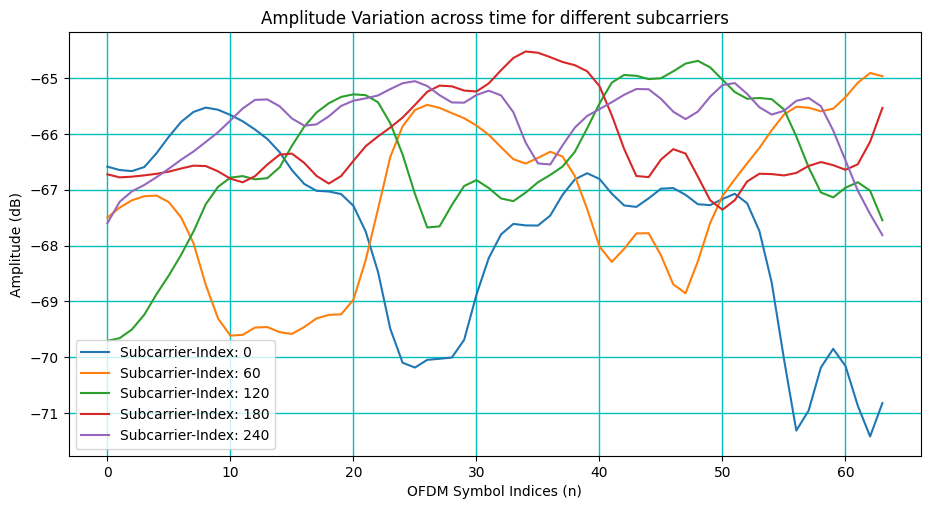

In [13]:
fig, ax = plt.subplots(figsize = (11,5.5))

carrierIndex = 0
bsIndex      = 0
ueIndex      = 0
bsAntIndex   = 0
ueAntIndex   = 0

for sc in range(0,300,60):
    ax.plot(10*np.log10(np.abs(Hf[carrierIndex,:,bsIndex,ueIndex,sc,bsAntIndex,ueAntIndex])), label="Subcarrier-Index: "+str(sc))
ax.legend()
ax.grid(color='c', linestyle='-', linewidth=1)
ax.set_xlabel("OFDM Symbol Indices (n)")
ax.set_ylabel("Amplitude (dB)")
ax.set_title("Amplitude Variation across time for different subcarriers")
# Gridlines based on minor ticks
plt.show()

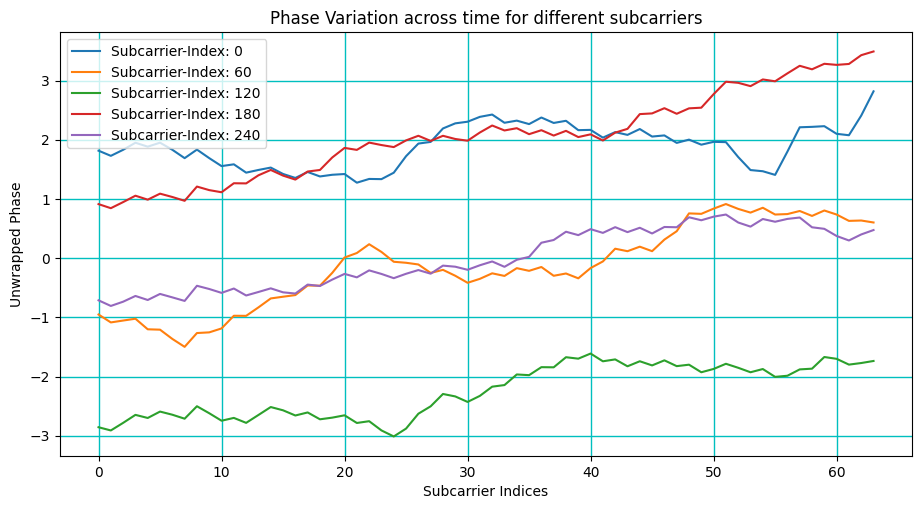

In [14]:
fig, ax = plt.subplots(figsize = (11,5.5))

carrierIndex = 0
bsIndex      = 0
ueIndex      = 0
bsAntIndex   = 0
ueAntIndex   = 0

for sc in range(0,300,60):
    ax.plot(np.unwrap(np.angle(Hf[carrierIndex,:,bsIndex,ueIndex,sc,bsAntIndex,ueAntIndex])), label="Subcarrier-Index: "+str(sc))
ax.legend()
ax.grid(color='c', linestyle='-', linewidth=1)
ax.set_xlabel("Subcarrier Indices")
ax.set_ylabel("Unwrapped Phase")
ax.set_title("Phase Variation across time for different subcarriers")

# Gridlines based on minor ticks
plt.show()

### Amplitude Heatmap

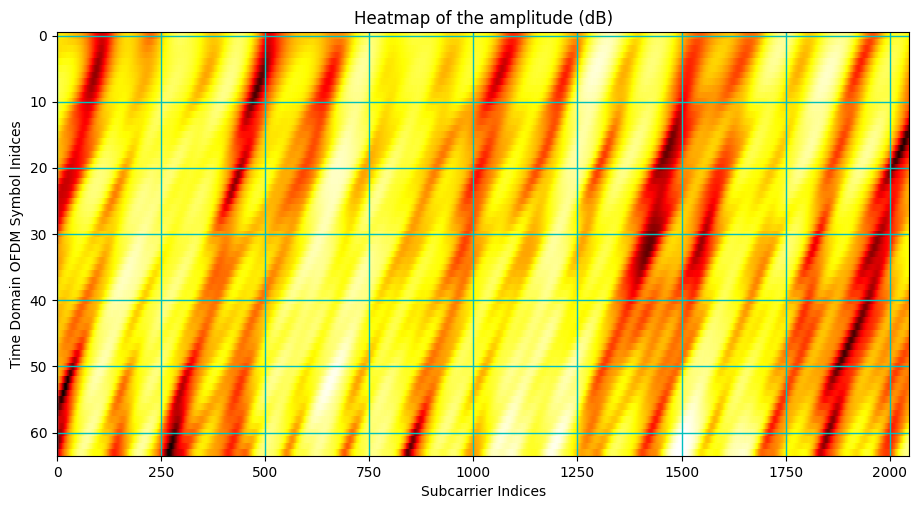

In [15]:
fig, ax = plt.subplots(figsize = (11,5.5))

carrierIndex = 0
bsIndex      = 0
ueIndex      = 0
bsAntIndex   = 0
ueAntIndex   = 0

ax.imshow(10*np.log10(np.abs(Hf[carrierIndex,:,bsIndex,ueIndex,:,bsAntIndex,ueAntIndex])), cmap = 'hot', interpolation='nearest', aspect = "auto")
ax = plt.gca();
ax.grid(color='c', linestyle='-', linewidth=1)
ax.set_xlabel("Subcarrier Indices")
ax.set_ylabel("Time Domain OFDM Symbol Inidces")
ax.set_title("Heatmap of the amplitude (dB)")

# Gridlines based on minor ticks
plt.show()

### Phase Spectrum

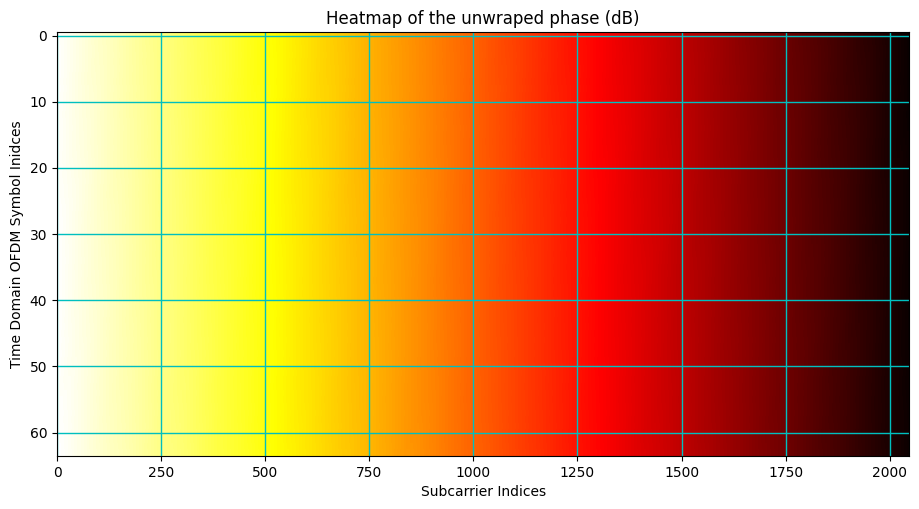

In [16]:
fig, ax = plt.subplots(figsize = (11,5.5))

carrierIndex = 0
bsIndex      = 0
ueIndex      = 0
bsAntIndex   = 0
ueAntIndex   = 0

ax.imshow(np.unwrap(np.angle(Hf[carrierIndex,:,bsIndex,ueIndex,:,bsAntIndex,ueAntIndex])), cmap = 'hot', interpolation='nearest', aspect = "auto")
ax = plt.gca();
ax.grid(color='c', linestyle='-', linewidth=1)
ax.set_xlabel("Subcarrier Indices")
ax.set_ylabel("Time Domain OFDM Symbol Inidces")
ax.set_title("Heatmap of the unwraped phase (dB)")
# Gridlines based on minor ticks
plt.show()

## Doppler Domain Sparsity

In [17]:
ht       = np.fft.ifft(Hf, n = Nfft, axis=-3)
hDoppler = np.fft.ifft(ht, n = nSnapShots, axis=1)

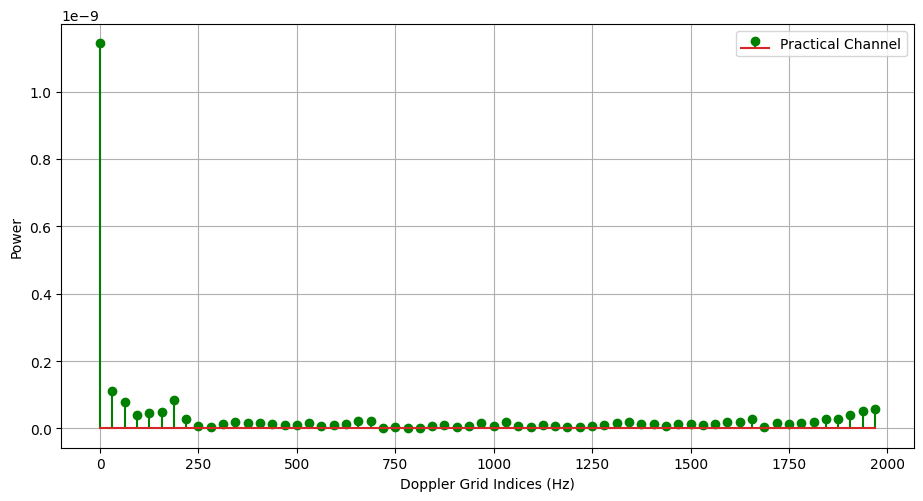

In [18]:
fig, ax = plt.subplots(figsize = (11,5.5))

carrierIndex = 0
snapIndex    = 0
bsIndex      = 0
ueIndex      = 0
bsAntIndex   = 0
ueAntIndex   = 0


# ax.stem(channel.delays[carrierIndex,snapIndex,bsIndex,ueIndex], np.abs(channel.coefficients[carrierIndex,snapIndex,bsIndex,ueIndex,:,ueAntIndex,bsAntIndex]), "r", label = "Ideal Channel")
ax.stem(np.arange(nSnapShots)/(nSnapShots*0.5*10**-3), np.abs(hDoppler[carrierIndex,:,bsIndex,ueIndex,2,ueAntIndex,bsAntIndex]), "g", label = "Practical Channel")
ax.legend()
# ax.set_xlim([0, 0.25*10**-5])
ax.set_xlabel("Doppler Grid Indices (Hz)")
ax.set_ylabel("Power")
ax.grid()
plt.show()

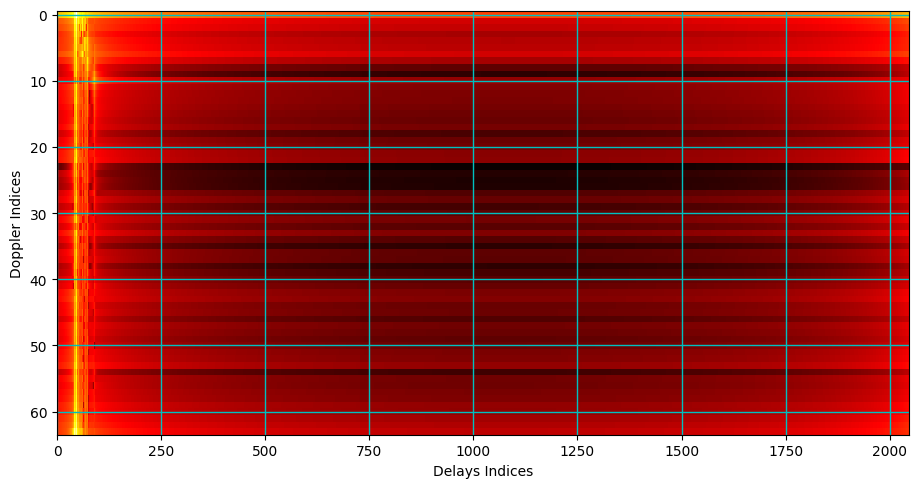

In [19]:
fig, ax = plt.subplots(figsize = (11,5.5))

carrierIndex = 0
bsIndex      = 0
ueIndex      = 0
bsAntIndex   = 0
ueAntIndex   = 0

ax.imshow(10*np.log10(np.abs(hDoppler[carrierIndex,:,bsIndex,ueIndex,:,bsAntIndex,ueAntIndex])), cmap = 'hot', interpolation='nearest', aspect = "auto")
ax = plt.gca();
ax.grid(color='c', linestyle='-', linewidth=1)
ax.set_xlabel("Delays Indices")
ax.set_ylabel("Doppler Indices")
# Gridlines based on minor ticks
plt.show()

## Delay/Time Domain: Sparsity

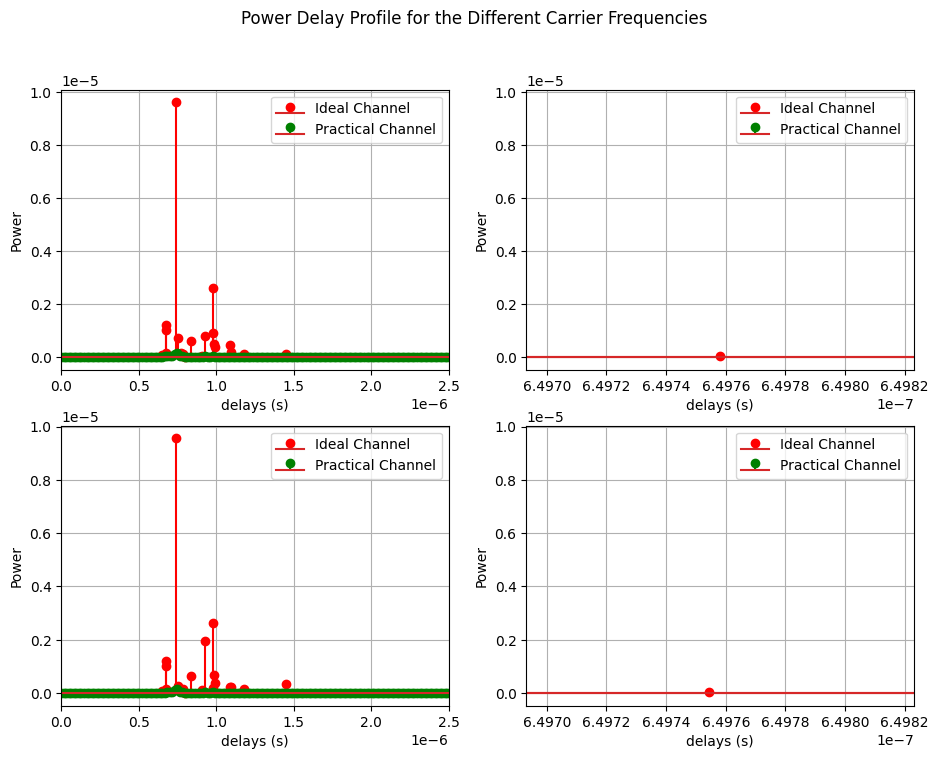

In [20]:

fig, ax = plt.subplots(2,2,figsize = (11,8))

carrierIndex = 0
snapIndex    = 0
bsIndex      = 0
ueIndex      = 0
bsAntIndex   = 0
ueAntIndex   = 0

tau0 = channel.delays[carrierIndex,snapIndex,bsIndex,ueIndex,1]

ax[0,0].stem(channel.delays[carrierIndex,snapIndex,bsIndex,ueIndex], np.abs(channel.coefficients[carrierIndex,snapIndex,bsIndex,ueIndex,:,ueAntIndex,bsAntIndex]), "r", label = "Ideal Channel")
ax[0,0].stem(np.arange(Nfft)/(Nfft*channel.subCarrierSpacing), np.abs(ht[carrierIndex,snapIndex,bsIndex,ueIndex,:,ueAntIndex,bsAntIndex]), "g", label = "Practical Channel")
ax[0,0].legend()
ax[0,0].set_xlim([0, 0.25*10**-5])
ax[0,0].set_xlabel("delays (s)")
ax[0,0].set_ylabel("Power")
ax[0,0].grid()

ax[0,1].stem(channel.delays[carrierIndex,snapIndex,bsIndex,ueIndex], np.abs(channel.coefficients[carrierIndex,snapIndex,bsIndex,ueIndex,:,ueAntIndex,bsAntIndex]), "r", label = "Ideal Channel")
ax[0,1].stem(np.arange(Nfft)/(Nfft*channel.subCarrierSpacing), np.abs(ht[carrierIndex,snapIndex,bsIndex,ueIndex,:,ueAntIndex,bsAntIndex]), "g", label = "Practical Channel")
ax[0,1].legend()
ax[0,1].set_xlim([0.9999*tau0, 1.0001*tau0])
ax[0,1].set_xlabel("delays (s)")
ax[0,1].set_ylabel("Power")
ax[0,1].grid()

snapIndex    = 13

ax[1,0].stem(channel.delays[carrierIndex,snapIndex,bsIndex,ueIndex], np.abs(channel.coefficients[carrierIndex,snapIndex,bsIndex,ueIndex,:,ueAntIndex,bsAntIndex]), "r", label = "Ideal Channel")
ax[1,0].stem(np.arange(Nfft)/(Nfft*channel.subCarrierSpacing), np.abs(ht[carrierIndex,snapIndex,bsIndex,ueIndex,:,ueAntIndex,bsAntIndex]), "g", label = "Practical Channel")
ax[1,0].legend()
ax[1,0].set_xlim([0, 0.25*10**-5])
ax[1,0].set_xlabel("delays (s)")
ax[1,0].set_ylabel("Power")
ax[1,0].grid()

ax[1,1].stem(channel.delays[carrierIndex,snapIndex,bsIndex,ueIndex], np.abs(channel.coefficients[carrierIndex,snapIndex,bsIndex,ueIndex,:,ueAntIndex,bsAntIndex]), "r", label = "Ideal Channel")
ax[1,1].stem(np.arange(Nfft)/(Nfft*channel.subCarrierSpacing), np.abs(ht[carrierIndex,snapIndex,bsIndex,ueIndex,:,ueAntIndex,bsAntIndex]), "g", label = "Practical Channel")
ax[1,1].legend()
ax[1,1].set_xlabel("delays (s)")
ax[1,1].set_ylabel("Power")
ax[1,1].grid()
ax[1,1].set_xlim([0.9999*tau0, 1.0001*tau0])

fig.suptitle("Power Delay Profile for the Different Carrier Frequencies")
plt.show()